In [1]:
import numpy as np
import random
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import bernoulli as bern, cauchy, norm, gamma, poisson as pois, binom, uniform, laplace, expon, trim_mean, iqr, beta, chi2_contingency, kstwobign, kstest, t, chi2, kruskal
from scipy.stats import anderson, shapiro, normaltest, weibull_min, geom, nbinom
import statistics
import scipy.stats as sts
from tqdm import tqdm
from matplotlib import rc
from math import pi, log, tan, sin, exp, sqrt
from scipy.optimize import minimize
import scipy.special
import statsmodels.api as sm
import pandas as pd
import time

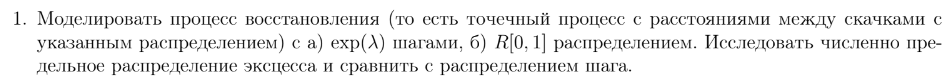

# пункт a)

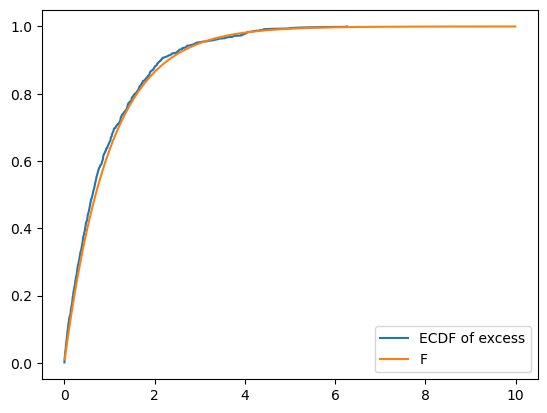

In [2]:
l = 1
n = 1000
m = 1000
e = expon.rvs(scale = 1/l, size = (m,n))
s = np.cumsum(e, axis = 1)
scale = s[:,n-1]
u = uniform.rvs(scale = scale )
time = np.array([s[i][np.searchsorted(s[i], u[i], side='right')]-u[i] for i in range(m)])
y = ECDF(time)
plt.plot(y.x,y.y, label = f'ECDF of excess')
X = np.arange(1, m)/m*10
Y = expon.cdf(X, scale = 1/l)
plt.plot(X, Y, label = f'F')
plt.legend()

Text(0, 0.5, '$\\eta_t$')

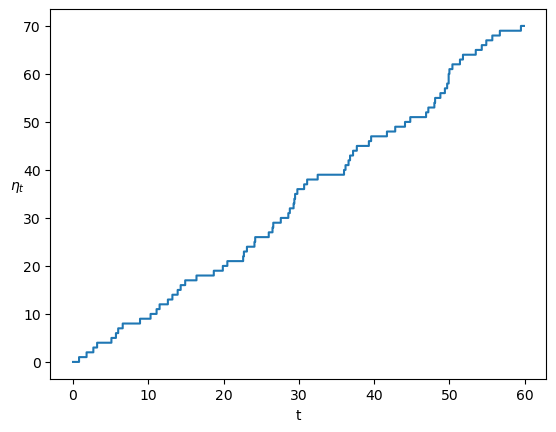

In [3]:
t = np.arange(600)/10
x = np.searchsorted(s[0], t, side='right')
plt.step(t, x, where = 'post')
plt.xlabel('t', fontsize=10)
plt.ylabel(r'$\eta_t$', fontsize=10, rotation=0)

# Пункт б)


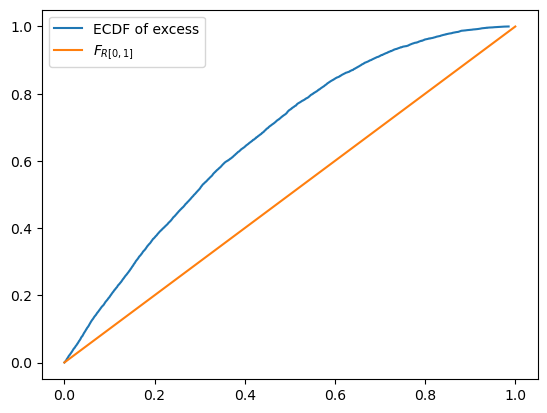

In [5]:
n = 10000
m = 10000
e = uniform.rvs( size = (m,n))
s = np.cumsum(e, axis = 1)
scale = s[:,n-1]
u = uniform.rvs(scale = scale )
time = np.array([s[i][np.searchsorted(s[i], u[i], side='right')]-u[i] for i in range(m)])
y = ECDF(time)
plt.plot(y.x,y.y, label = 'ECDF of excess')
X = np.arange(1, m)/m
Y = uniform.cdf(X)
plt.plot(X, Y, label = r'$F_{R[0,1]}$')
plt.legend()

Text(0, 0.5, '$\\eta_t$')

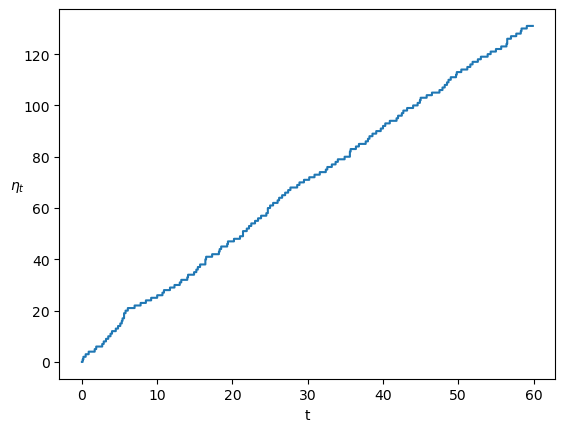

In [6]:
t = np.arange(600)/10
x = np.searchsorted(s[0], t, side='right')
plt.step(t, x, where = 'post')
plt.xlabel('t', fontsize=10)
plt.ylabel(r'$\eta_t$', fontsize=10, rotation=0)

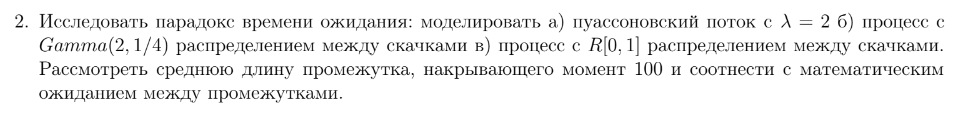

# Пункт а)

Средняя длина промежутка, накрывающего момент 100 = 0.9899907138908713
Математическое ожидание времени промежутков = 0.5


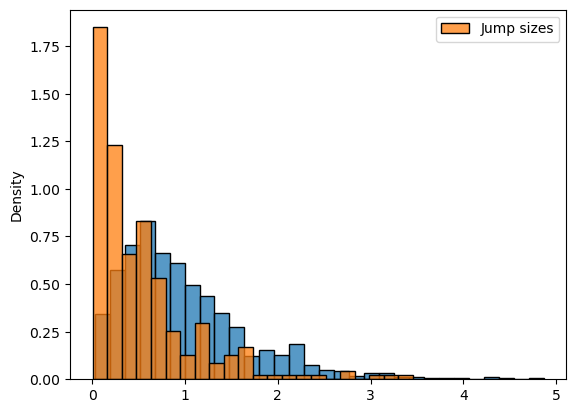

In [8]:
import seaborn as sns

n = 300
m = 1000
l = 2
e = expon.rvs(scale = 1/l, size = (m,n))
s = np.cumsum(e, axis = 1)
time = 100
length = np.array([s[i][np.searchsorted(s[i], time, side='right')] - s[i][np.searchsorted(s[i], time, side='right')  - 1] for i in range(m)])
print(f'Средняя длина промежутка, накрывающего момент 100 = {np.mean(length)}')
print(f'Математическое ожидание времени промежутков = {1/l}')
sns.histplot(length, label = '', stat = 'density')
sns.histplot(e[0], label = 'Jump sizes', stat = 'density')
plt.legend()
plt.show()

Text(0, 0.5, '$\\eta_t$')

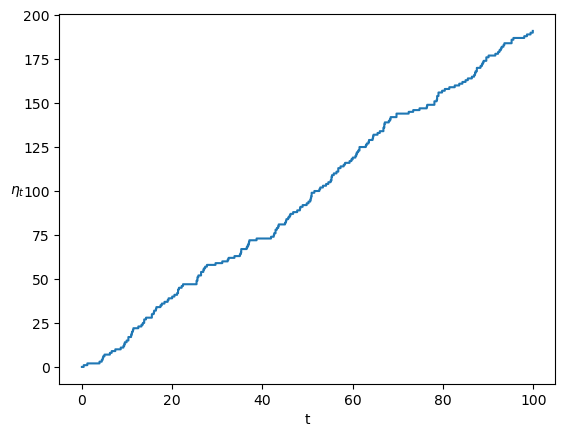

In [9]:
t = np.arange(1000)/10
x = np.searchsorted(s[0], t, side='right')
plt.step(t, x, where = 'post')
plt.xlabel('t', fontsize=10)
plt.ylabel(r'$\eta_t$', fontsize=10, rotation=0)

# пункт б)

Средняя длина промежутка, накрывающего момент 100 = 0.7588957227190268
Математическое ожидание времени промежутков = 0.5


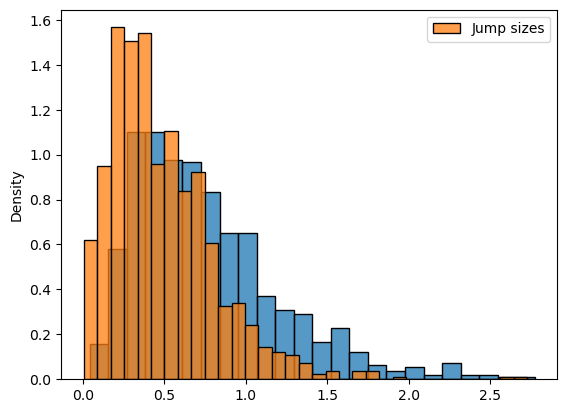

In [10]:
n = 1000
m = 1000
e = gamma.rvs(a = 2, scale = 1/4, size = (m,n))
s = np.cumsum(e, axis = 1)
time = 100
length = np.array([s[i][np.searchsorted(s[i], time, side='right')] - s[i][np.searchsorted(s[i], time, side='right') - 1] for i in range(m)])
print(f'Средняя длина промежутка, накрывающего момент 100 = {np.mean(length)}')
print(f'Математическое ожидание времени промежутков = {1/2}')
sns.histplot(length, label = '', stat = 'density')
sns.histplot(e[0], label = 'Jump sizes', stat = 'density')
plt.legend()
plt.show()

Text(0, 0.5, '$\\eta_t$')

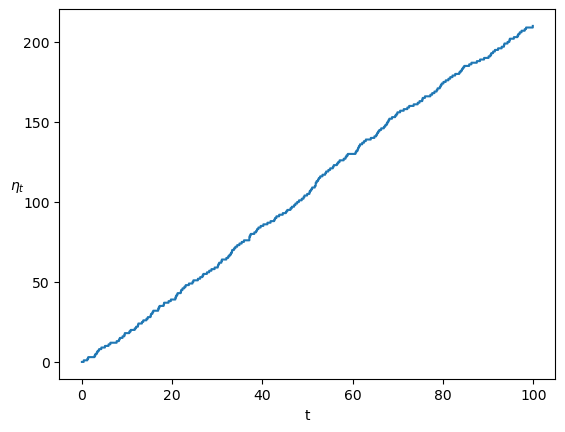

In [11]:
t = np.arange(1000)/10
x = np.searchsorted(s[0], t, side='right')
plt.step(t, x, where = 'post')
plt.xlabel('t', fontsize=10)
plt.ylabel(r'$\eta_t$', fontsize=10, rotation=0)

# Пункт с)

Средняя длина промежутка, накрывающего момент 100 = 0.6763295213536917
Математическое ожидание времени промежутков = 0.5


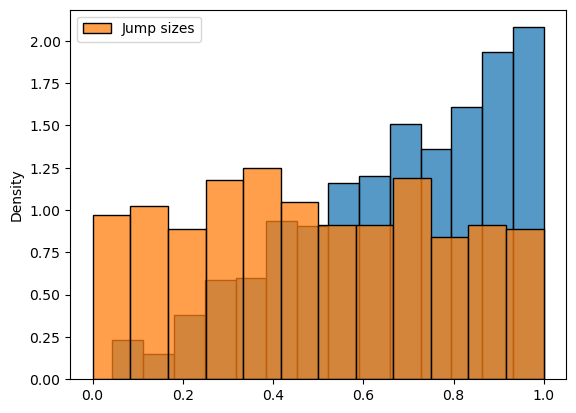

In [12]:
n = 1000
m = 1000
e = uniform.rvs( size = (m,n))
s = np.cumsum(e, axis = 1)
time = 100
length = np.array([s[i][np.searchsorted(s[i], time, side='right')] - s[i][np.searchsorted(s[i], time, side='right') - 1] for i in range(m)])
print(f'Средняя длина промежутка, накрывающего момент 100 = {np.mean(length)}')
print(f'Математическое ожидание времени промежутков = {1/2}')
sns.histplot(length, label = '', stat = 'density')
sns.histplot(e[0], label = 'Jump sizes', stat = 'density')
plt.legend()
plt.show()

Text(0, 0.5, '$\\eta_t$')

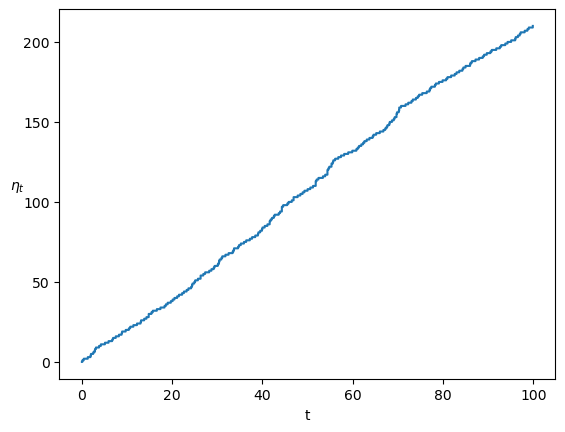

In [13]:
t = np.arange(1000)/10
x = np.searchsorted(s[0], t, side='right')
plt.step(t, x, where = 'post')
plt.xlabel('t', fontsize=10)
plt.ylabel(r'$\eta_t$', fontsize=10, rotation=0)

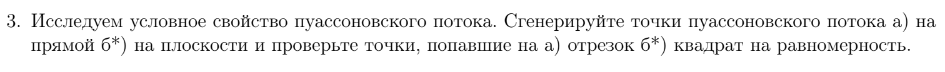

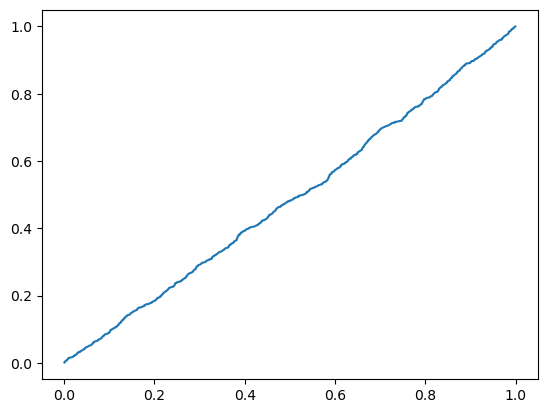

In [14]:
n = 1000
m = 1000
l = 2
e = expon.rvs(scale = 1/l, size = (m,n))
s = np.cumsum(e, axis = 1)
r = np.arange(1,m+1)/m
k = int(log(n)/log(2))
bins = [[i/k * 400 for i in range(k+1)] for j in range(m)]

obs = [pd.cut(s[i], bins = bins[i]).value_counts().tolist() for i in range(m)]
pva = np.sort([scipy.stats.chisquare(f_obs = obs[i]).pvalue for i in range(m)])
plt.plot(pva, r, label = f'chisquare')

#### Вывод: точки на отрезках распределены равномерно

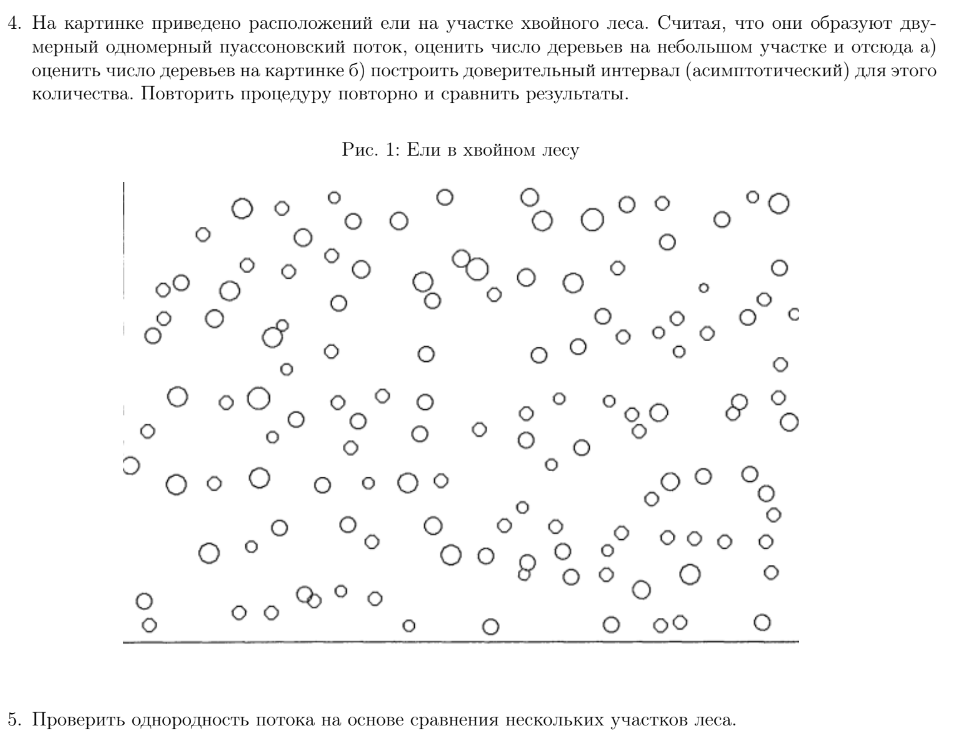

# Замер номер 1

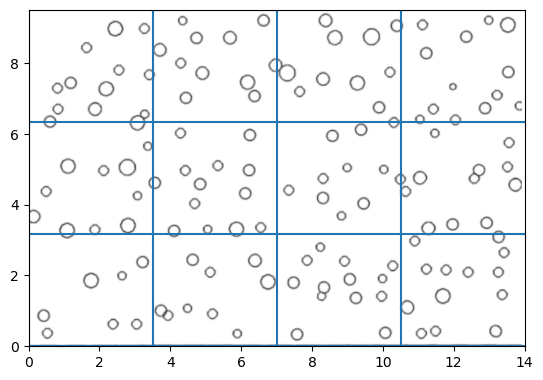

In [39]:
datafile = 'картинки\Дерево.png'
img = plt.imread(datafile)
plt.imshow(img, zorder=0, extent=[0, 14, 0, 9.5])
plt.hlines(y=np.arange(0, 9.5, 3.16), xmin=0, xmax=14)
plt.vlines(x=np.arange(0, 14, 3.5), ymin=0, ymax=9.5)
plt.show()

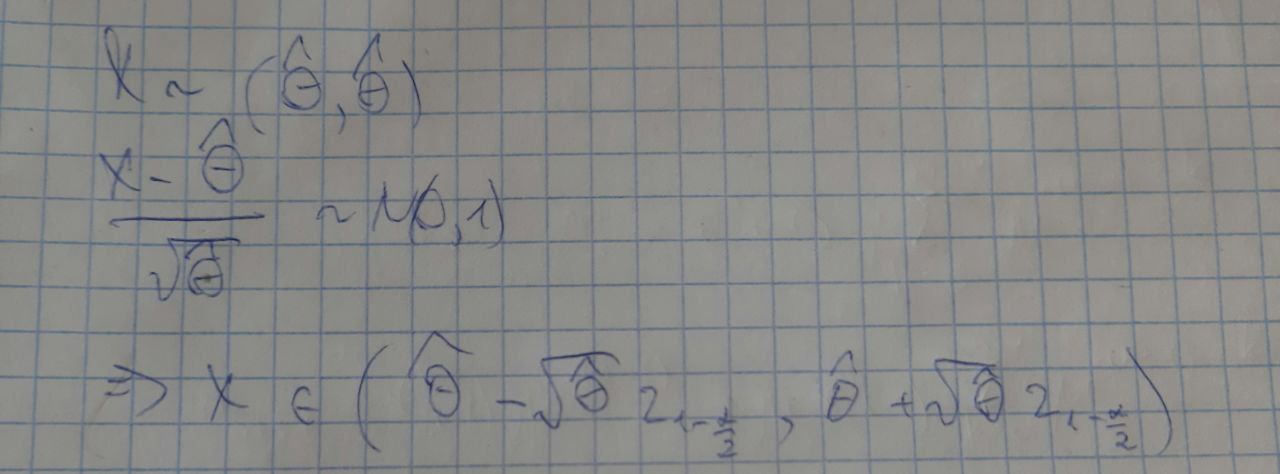

### Берем, например, последнюю строчку 3 столбец, там 13 точек, всего 12 "квадратов" => 156 точек

In [37]:
import scipy.stats as sts

print("Дов. интервал для количества =", \
"(",156 - np.sqrt(156) * sts.norm().ppf(1 - 0.05/2),",", 156 + np.sqrt(156) * sts.norm().ppf(1 - 0.05/2),")")

Дов. интервал для количества = ( 131.52005767922884 , 180.47994232077116 )


# Второй замер(плохой случай)

### Берем, например, последнюю строчку 1 столбец, там 7 точек, всего 12 "квадратов" => 84 точки

In [38]:
import scipy.stats as sts

print("Дов. интервал для количества =", \
"(",84 - np.sqrt(84) * sts.norm().ppf(1 - 0.05/2),",", 84 + np.sqrt(84) * sts.norm().ppf(1 - 0.05/2),")")

Дов. интервал для количества = ( 66.0366333629159 , 101.9633666370841 )


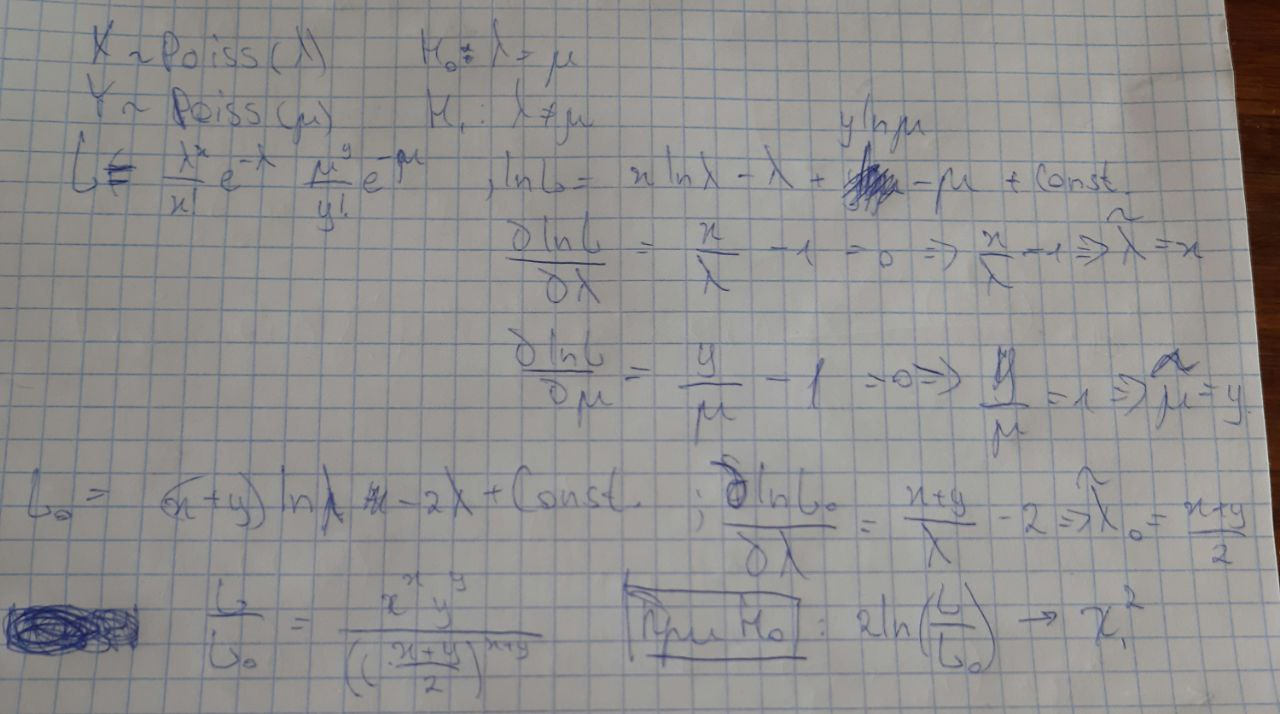

### 1)Берем, например, последнюю строчку 3 столбец, там 13 точек
### 2)и берем, например, последнюю строчку 1 столбец, там 7 точек

In [48]:
x = 7
y = 13
2 * np.log((x ** x) * (y ** y) / (((x + y) / 2) ** (x + y)))

1.8280216610125142

In [47]:
sts.chi2(df=1).ppf(1 - 0.05)

3.841458820694124

# Вывод: однородный